# **Salary Prediction with XGBoost Regression - Hyperparameter Optimization**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
#import paskages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler



In [3]:
#Load dataset
df=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [4]:
#head data
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Will drop columns Unnamed: 0 ; is not usefull f

In [5]:
#drop Unnamed: 0 
df.drop(columns=['Unnamed: 0'] , axis=1 , inplace=True)

In [6]:
#check data againg
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
## Summary statistics
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
#get information data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
# Check for missing values
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


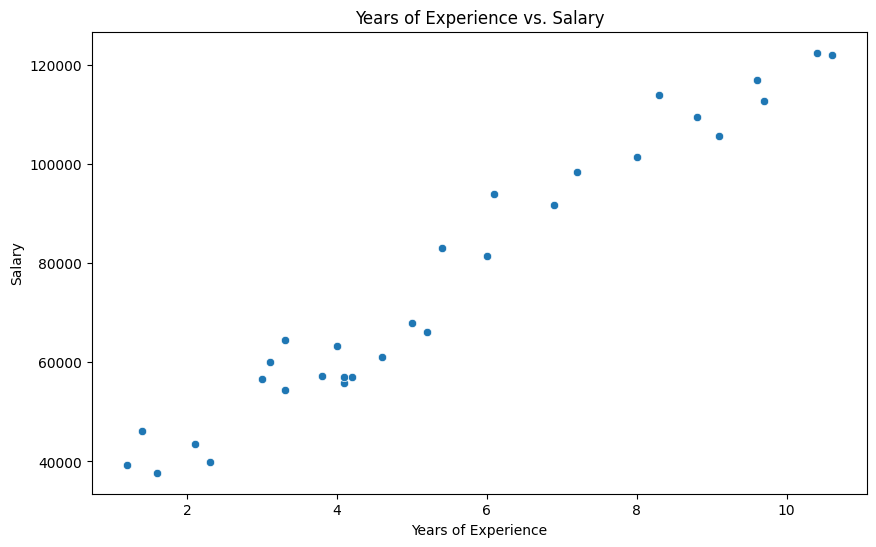

In [10]:
# Scatter plot: YearsExperience vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


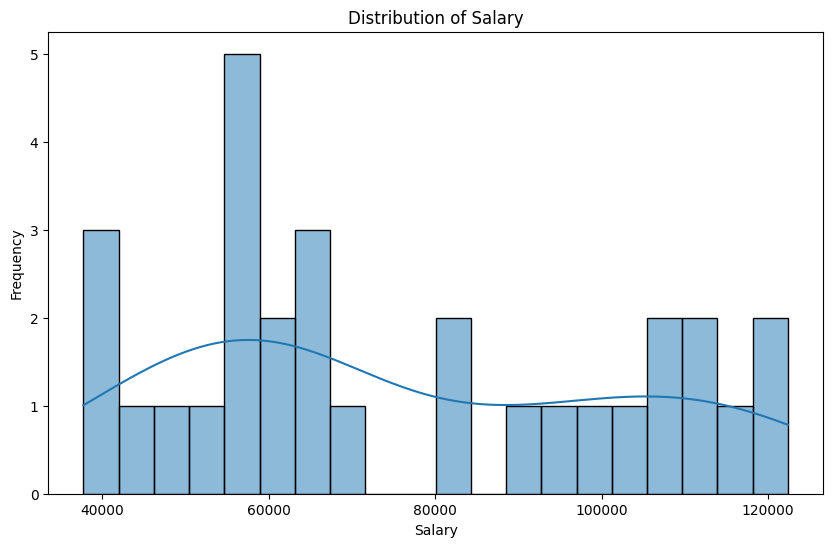

In [11]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

"YearsExperience" and "Salary" are on different scales, it might be beneficial to normalize them.

In [12]:
## Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [13]:
## Normalize the data
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

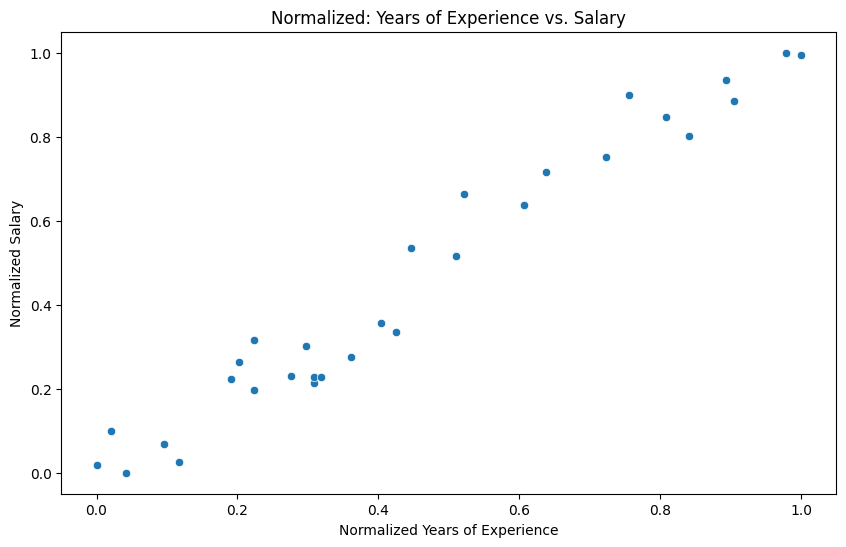

In [14]:
# Scatter plot: YearsExperience vs. Salary (after normalization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Normalized: Years of Experience vs. Salary')
plt.xlabel('Normalized Years of Experience')
plt.ylabel('Normalized Salary')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


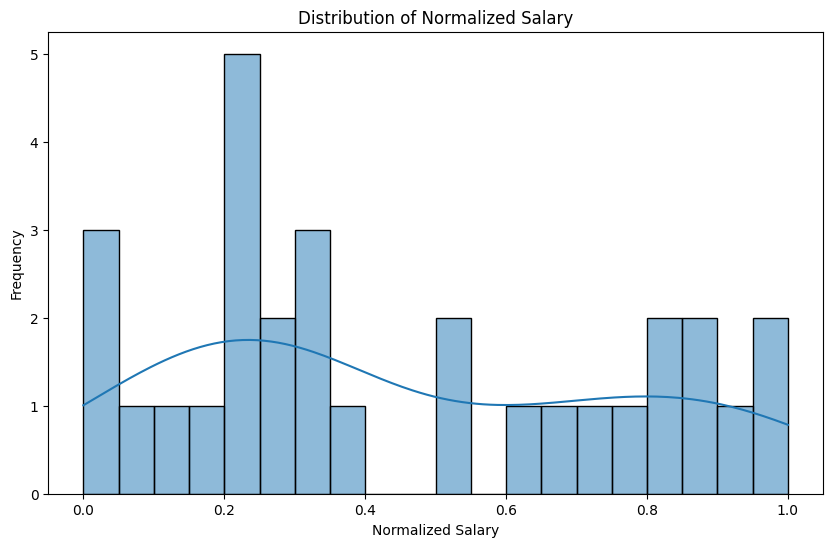

In [15]:
# Distribution of Salary (after normalization)
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Normalized Salary')
plt.xlabel('Normalized Salary')
plt.ylabel('Frequency')
plt.show()

In [16]:

# Splitting the data into training and testing sets
X = df[['YearsExperience']]  # Feature matrix
y = df['Salary']             # Target variable


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 perform hyperparameter tuning using random search

In [18]:
# Define hyperparameter grid
param_dist = {
    'max_depth': randint(3, 10),            # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),    # Learning rate
    'n_estimators': randint(100, 1000),     # Number of trees
    'gamma': uniform(0, 0.5),               # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': uniform(0.5, 0.5),         # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.5),           # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5)           # L2 regularization term on weights
}


In [19]:
# Initialize the XGBoost regressor
xgb = XGBRegressor()


In [20]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42)


In [21]:
# Perform random search
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9f5e012560>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9f5e0122c0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9f5e0124d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9f5e011870>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [22]:
# Get the best estimator and its parameters
best_xgb = random_search.best_estimator_
best_params = random_search.best_params_


In [23]:
# Evaluate the best model
y_pred_best = best_xgb.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error:", mse_best)


Best Model Mean Squared Error: 0.012621302710008726


In [24]:
print("Best Model Hyperparameters:", best_params)

Best Model Hyperparameters: {'colsample_bytree': 0.8842770071531545, 'gamma': 0.021801885877216876, 'learning_rate': 0.3083651532392023, 'max_depth': 8, 'n_estimators': 576, 'reg_alpha': 0.1397801708983793, 'reg_lambda': 0.4417470111331295, 'subsample': 0.873859386948707}



To visualize the scores of the different combinations of hyperparameters tried during the random search

In [25]:
# Get the mean cross-validated scores for each combination of hyperparameters
cv_results = random_search.cv_results_
mean_scores = cv_results['mean_test_score']


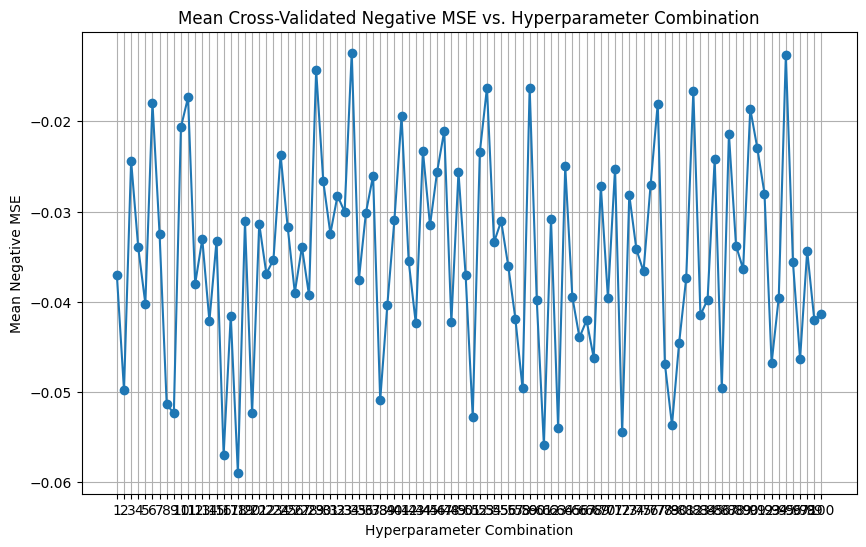

In [26]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_scores)), mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validated Negative MSE vs. Hyperparameter Combination')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Negative MSE')
plt.xticks(np.arange(len(mean_scores)), np.arange(1, len(mean_scores)+1))
plt.grid(True)
plt.show()

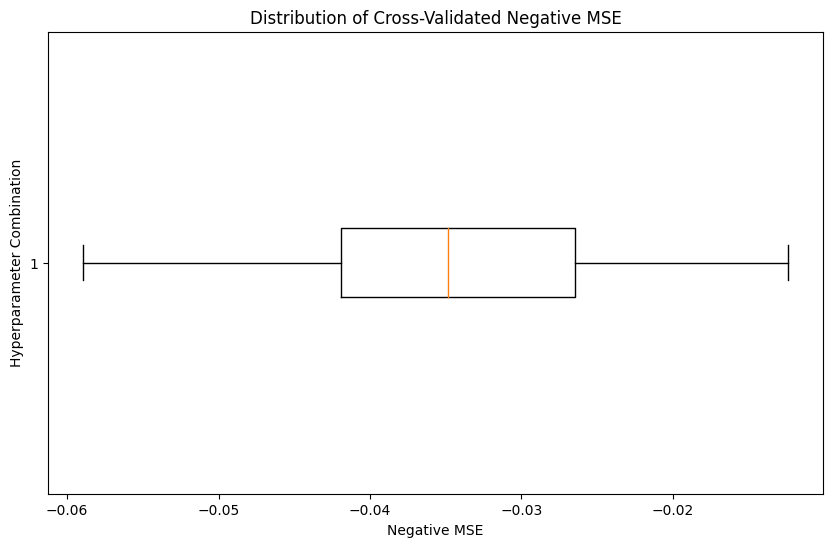

In [27]:
# Boxplot of cross-validated scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results['mean_test_score'], vert=False)
plt.title('Distribution of Cross-Validated Negative MSE')
plt.xlabel('Negative MSE')
plt.ylabel('Hyperparameter Combination')
plt.show()

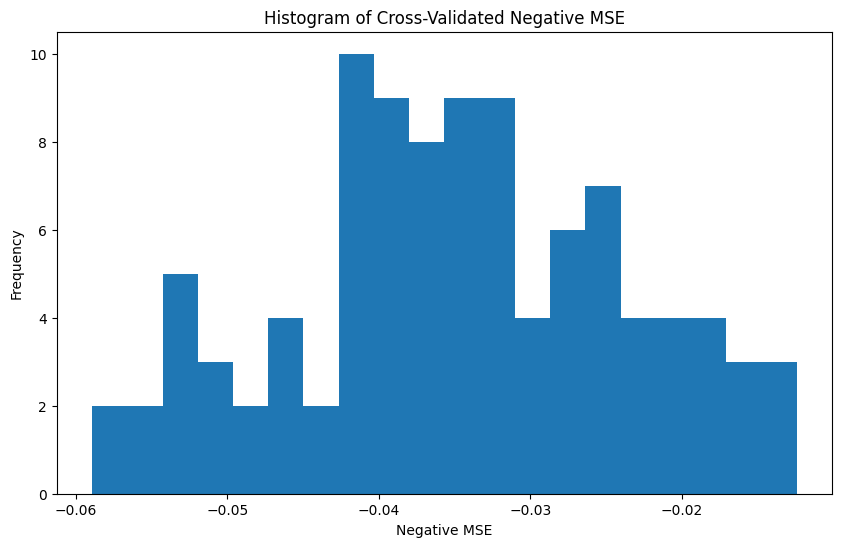

In [28]:
# Histogram of cross-validated scores
plt.figure(figsize=(10, 6))
plt.hist(cv_results['mean_test_score'], bins=20)
plt.title('Histogram of Cross-Validated Negative MSE')
plt.xlabel('Negative MSE')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

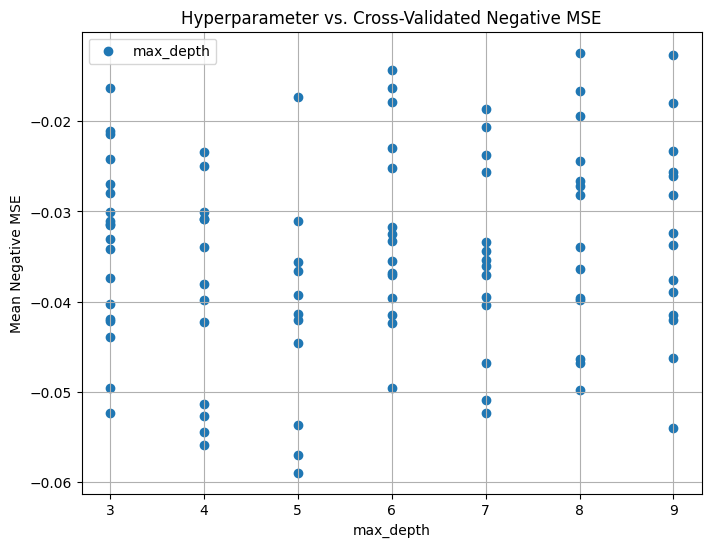

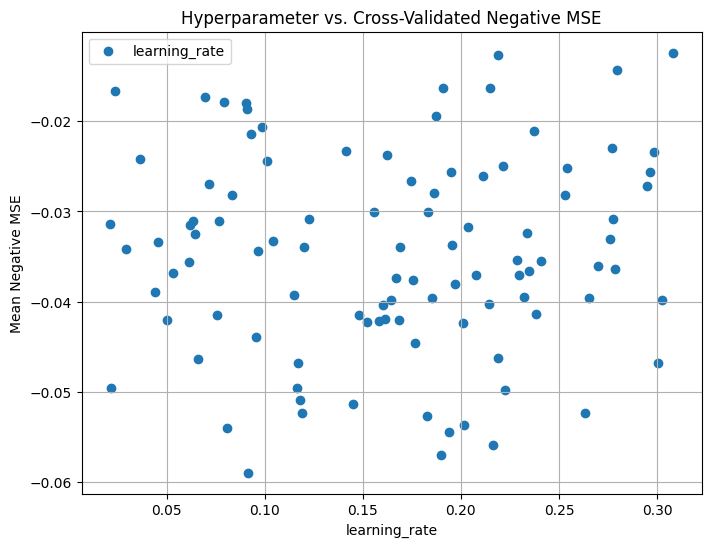

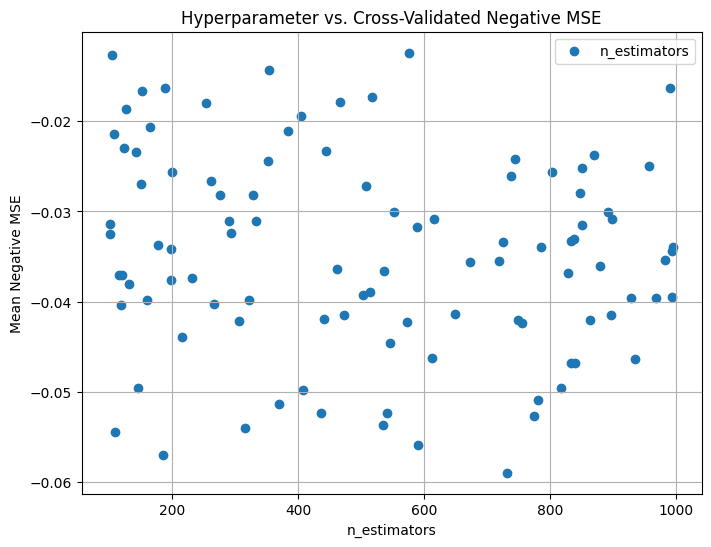

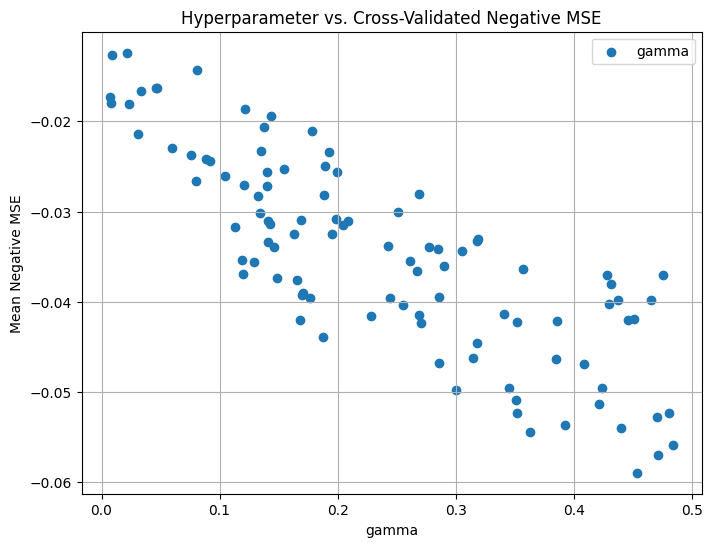

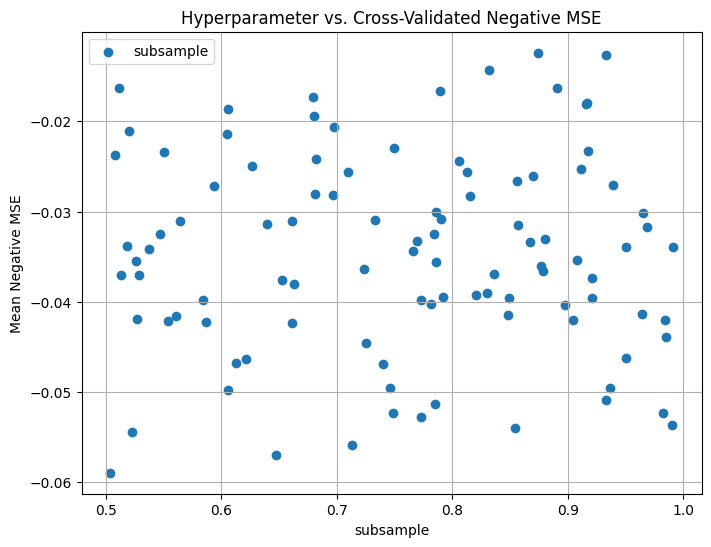

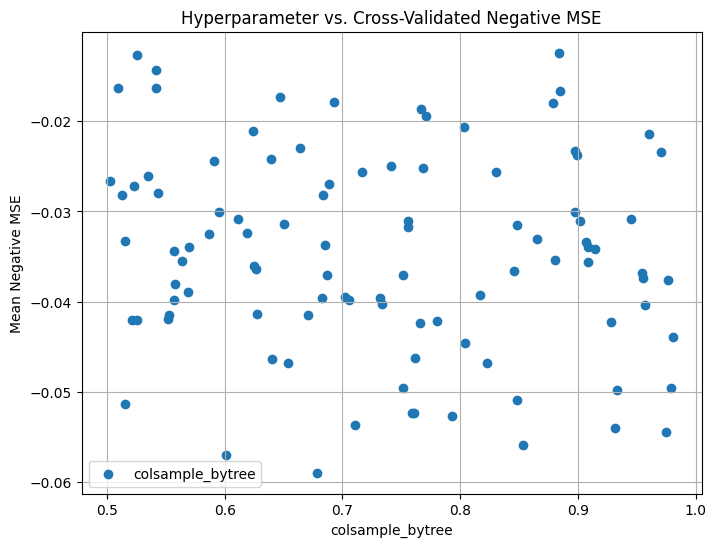

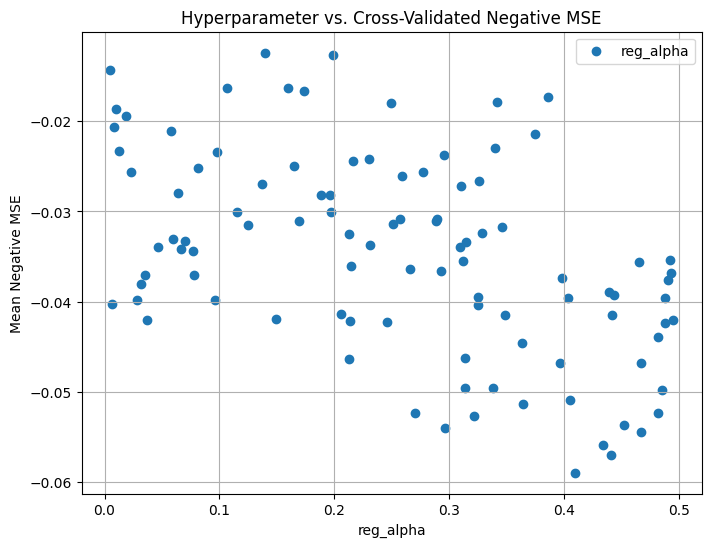

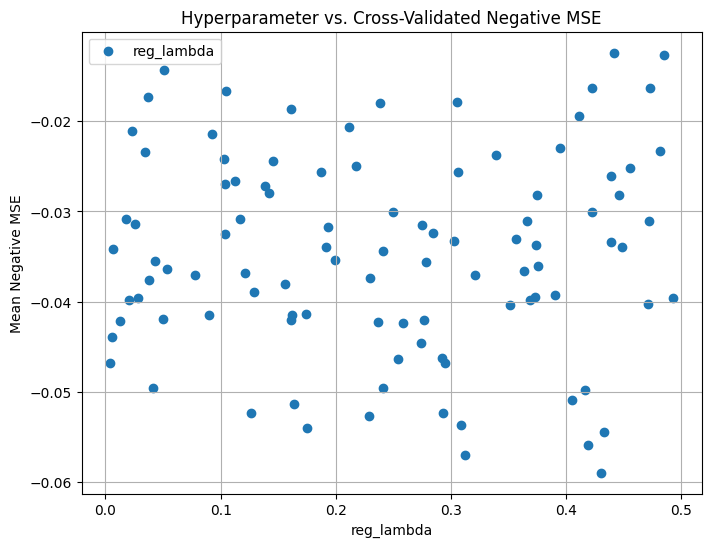

In [29]:
# Scatterplot of hyperparameters vs. scores
plt.figure(figsize=(12, 8))
for param in param_dist.keys():
    plt.figure(figsize=(8, 6))
    plt.scatter(cv_results['param_' + param], cv_results['mean_test_score'], label=param)
    plt.title('Hyperparameter vs. Cross-Validated Negative MSE')
    plt.xlabel(param)
    plt.ylabel('Mean Negative MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

Plotting the negative mean squared error (MSE) against the iteration number.

This can help visualize how the optimization process progresses over iterations. We can also plot the distribution of scores for each iteration.

In [30]:
# Get the negative mean squared error for each iteration
neg_mse = -1 * cv_results['mean_test_score']


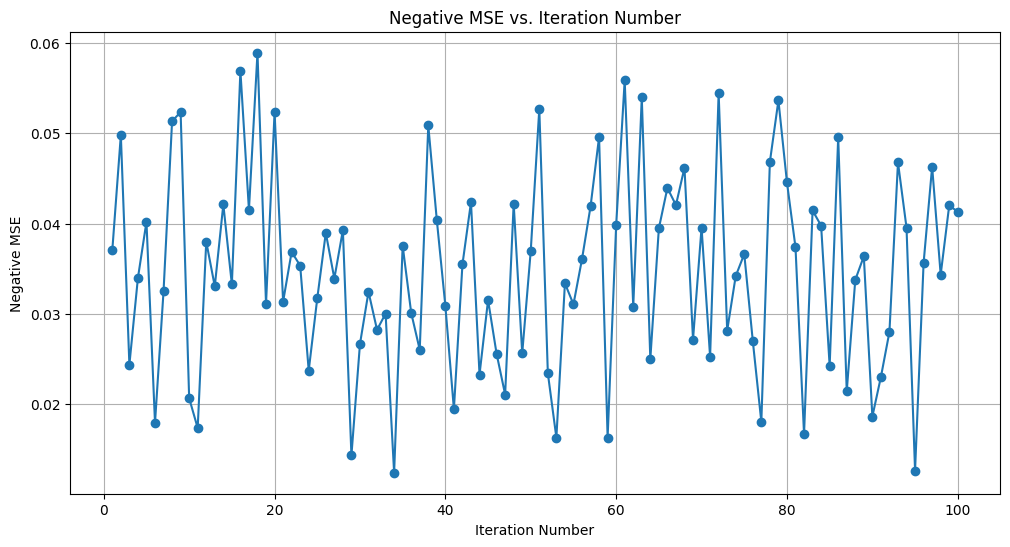

In [31]:

# Plot negative MSE vs. iteration number
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(neg_mse) + 1), neg_mse, marker='o', linestyle='-')
plt.title('Negative MSE vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Negative MSE')
plt.grid(True)
plt.show()




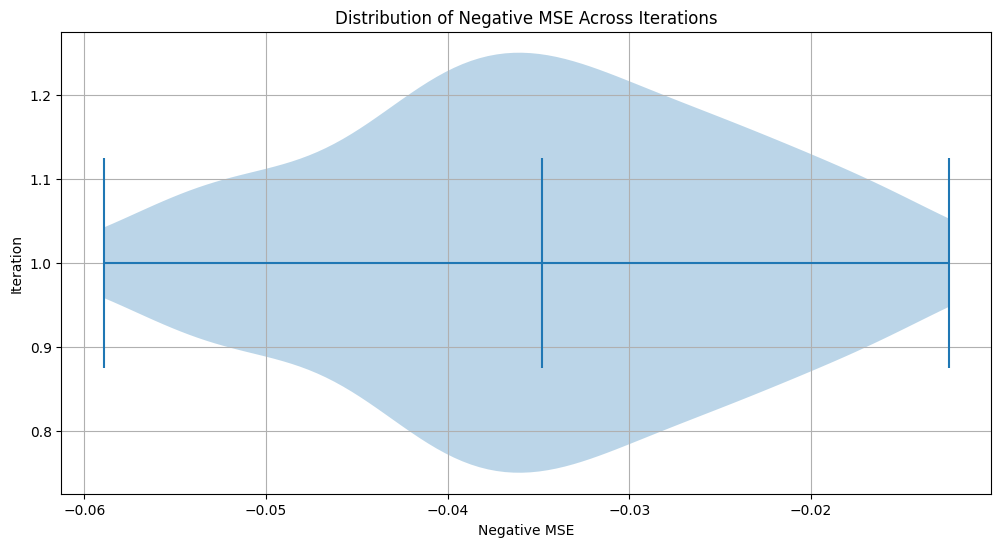

In [32]:
# Plot distribution of scores for each iteration
plt.figure(figsize=(12, 6))
plt.violinplot(cv_results['mean_test_score'], vert=False, showmeans=True)
plt.title('Distribution of Negative MSE Across Iterations')
plt.xlabel('Negative MSE')
plt.ylabel('Iteration')
plt.grid(True)
plt.show()